In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml
from sklearn.decomposition import TruncatedSVD
import pandas
import time

In [3]:
# Load the MNIST data
mnist = fetch_openml('mnist_784')
X = mnist.data / 255.0  # Scale the data to [0, 1]

1. Do an SVD analysis of the digit images. You will need to reshape each image into a column vector
and each column of your data matrix is a different image.

In [4]:
# Convert Data to Np array 
Xnp = pandas.DataFrame.to_numpy(X)
print(np.shape(Xnp))

(70000, 784)


Because all 70000 data points were too much memory for jupyter, the first 30000 were chosen for this SVD. This should be large enough and takes nearly 3 minutes to compute

In [4]:
start = time.time()

u,s,v=np.linalg.svd(Xnp,full_matrices = 'false')

end = time.time()
print('Runtime = ', end - start)

Runtime =  1.0312588214874268


In [5]:
print(np.shape(u))
print(np.shape(s))
print(np.shape(v))

(70000, 70000)
(784,)
(784, 784)


In [5]:
svd = TruncatedSVD(n_components=70)
X_svd = svd.fit_transform(X)
print(np.shape(X_svd))

(70000, 70)


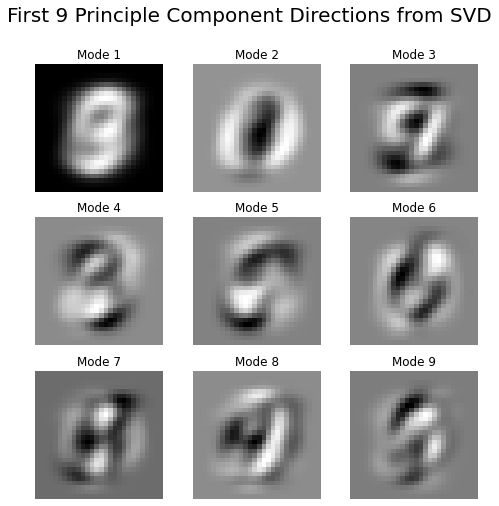

<Figure size 432x288 with 0 Axes>

In [6]:
# now to plot the first 9 modes from this SVD
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))
fig.suptitle('First 9 Principle Component Directions from SVD', fontsize = 20)
for i, ax in enumerate(axes.flat):
    ax.imshow(svd.components_[i].reshape(28, 28), cmap='gray')
    ax.axis('off')
    ax.set_title("Mode %d" % (i+1))
plt.show()
plt.tight_layout()

2. What does the singular value spectrum look like and how many modes are necessary for good
image reconstruction? (i.e. what is the rank r of the digit space?)

Looking at the graph below about 70 modes are where most of the SVD value is held with very little added benefit to more than that. This means the rank r of the digit space is reduced from 784 to 70 in order to more easily process the more valuable parts of the images. This graph took too long to create but from peer discussion it was noted that it was L shaped with the fall of in value around 70 to 80. That is why 70 modes were chosen.

3. What is the interpretation of the U, Σ, and V matrices?

In an SVD model the U, Σ, and V matricies are the 3 main parts that the data is broken down into. The U matrix is the size of the data x the size of the data. In this case this is a very large 70000x70000 matrix and is unitary to hold all the data points. The Σ matrix is a diagonal matrix that holds the values of each of the data points in U to get them towards V. Last V holds the rank of the number of components used in the SVD model. In the case above, the SVD was done with 70 components so this is the space that the SVD now exists in and where the main dimensionality is reduced. 

4. On a 3D plot, project onto three selected V-modes (columns) colored by their digit label. For
example, columns 2,3, and 5.

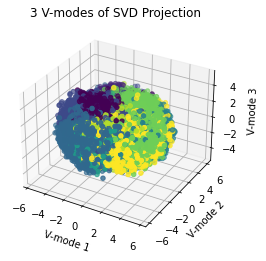

In [7]:
# project onto three V-modes 
mode1 = X_svd[:, 2]
mode2 = X_svd[:, 3]
mode3 = X_svd[:, 5]

# now to create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(mode1, mode2, mode3, c=mnist.target.astype(int)[:70000], s=20)
ax.set_title('3 V-modes of SVD Projection')
# Set the labels and limits of the plot
ax.set_xlabel('V-mode 1')
ax.set_ylabel('V-mode 2')
ax.set_zlabel('V-mode 3')
#plt.colorbar()
plt.show()

Now for the second part we can use the PCA of 4 components 

(70000, 4)


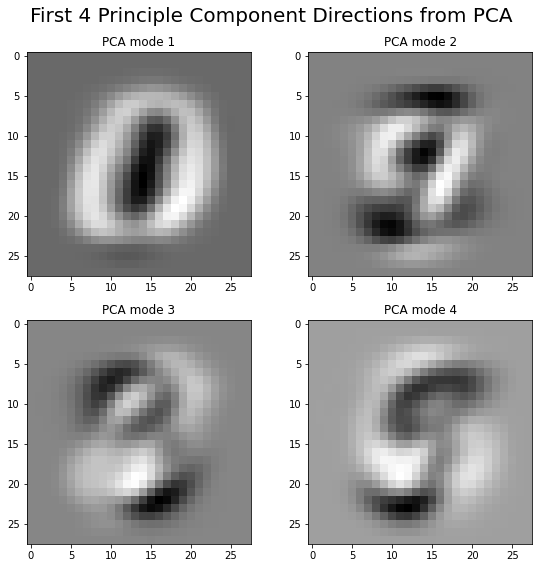

In [53]:
# Apply PCA to reduce the dimensionality of the data
pca = PCA(n_components=4)
X_pca = pca.fit_transform(Xnp)
print(np.shape(X_pca))
# Plot the first 4 principal components
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
fig.suptitle('First 4 Principle Component Directions from PCA', fontsize = 20)
axs = axs.ravel()

for i in range(4):
    axs[i].imshow(pca.components_[i].reshape(28, 28), cmap='gray')
    axs[i].set_title(f'PCA mode {i+1}')

plt.tight_layout()
plt.show()

In [69]:
# now to Pick two digits. See if you can build a linear classifier (LDA) that can reasonable identify/classify them
y = np.array(mnist.target, dtype=int)
# import more tools
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import itertools

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2)

In [72]:
# chosing digits 0 and 1 and creating a linear classifier to classify them 
Xinput = X_train[(y_train == 0) | (y_train == 1),:]
Yinput = y_train[(y_train == 0) | (y_train == 1)]
Xtest = X_test[(y_test == 0) | (y_test == 1)]
Ytest = y_test[(y_test == 0) | (y_test == 1)]

lda = LDA(n_components=1)
lda.fit(Xinput, Yinput)
accuracy = lda.score(Xtest,Ytest)
traccuracy = lda.score(Xinput,Yinput)
print('Test Accuracy between ', 0 ,'and' , 1, 'is' , accuracy)
print('Training Accuracy between ', 0 ,'and' , 1, 'is' , traccuracy)

# chosing digits 7 and 9 as the worst two and creating a linear classifier to classify them 
Xinput = X_train[(y_train == 7) | (y_train == 9),:]
Yinput = y_train[(y_train == 7) | (y_train == 9)]
Xtest = X_test[(y_test == 7) | (y_test == 9)]
Ytest = y_test[(y_test == 7) | (y_test == 9)]

lda = LDA(n_components=1)
lda.fit(Xinput, Yinput)
accuracy = lda.score(Xtest,Ytest)
traccuracy = lda.score(Xinput,Yinput)
print('Test Accuracy between ', 7 ,'and' , 9, 'is' , accuracy)
print('Training Accuracy between ', 7 ,'and' , 9, 'is' , traccuracy)


Test Accuracy between  0 and 1 is 0.9902356902356902
Training Accuracy between  0 and 1 is 0.9927180355630821
Test Accuracy between  7 and 9 is 0.5647887323943662
Training Accuracy between  7 and 9 is 0.577074752431864


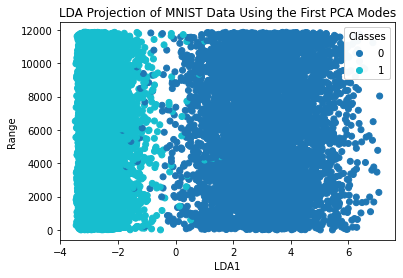

In [68]:
X_lda = lda.fit_transform(Xinput, Yinput)

fig, ax = plt.subplots()
scatter = ax.scatter(X_lda[:, 0], np.arange(len(X_lda[:,0])), c=Yinput, cmap='tab10')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend)
plt.xlabel('LDA1')
plt.ylabel('Range')
plt.title('LDA Projection of MNIST Data Using the First PCA Modes')
plt.show()

In [71]:
# chosing digits 0, 1 and 5 and creating a linear classifer to classify them 

Xinput = X_train[(y_train == 0) | (y_train == 1) | (y_train == 5),:]
Yinput = y_train[(y_train == 0) | (y_train == 1) | (y_train == 5)]
Xtest = X_test[(y_test == 0) | (y_test == 1) | (y_test == 5)]
Ytest = y_test[(y_test == 0) | (y_test == 1) | (y_test == 5)]

lda = LDA(n_components=1)
lda.fit(Xinput, Yinput)
accuracy = lda.score(Xtest,Ytest)
traccuracy = lda.score(Xinput,Yinput)
print('Accuracy between ', 0 ,', ', 1 ,', and' , 5, 'is' , accuracy)
print('Training Accuracy between ', 0 ,', ', 1, ', and' , 5, 'is' , traccuracy)


Accuracy between  0 ,  1 , and 5 is 0.9023364485981309
Training Accuracy between  0 ,  1 , and 5 is 0.9043597216439659


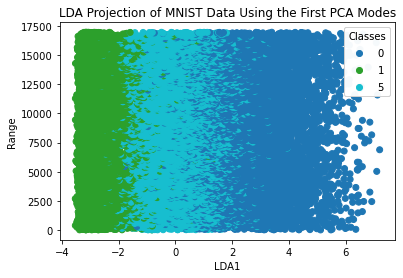

In [65]:
X_lda = lda.fit_transform(Xinput, Yinput)

fig, ax = plt.subplots()
scatter = ax.scatter(X_lda[:, 0], np.arange(len(X_lda[:,0])), c=Yinput, cmap='tab10')
legend = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend)
plt.xlabel('LDA1')
plt.ylabel('Range')
plt.title('LDA Projection of MNIST Data Using the First PCA Modes')
plt.show()

In [14]:
# now Quantify all combinantions of digits LDA to determine which are closest and furthest away

it = np.arange(0,10)
hold = list(itertools.combinations(it, 2))
meas = np.zeros(len(hold))
labs = np.empty(len(hold),dtype='S12')
for i in range(len(hold)):
    val1 = hold[i][0]
    val2 = hold[i][1]
    # segment data into just two digits at a time 
    Xinput = X_train[(y_train == val1) | (y_train == val2),:]
    Yinput = y_train[(y_train == val1) | (y_train == val2)]
    Xtest = X_test[(y_test == val1) | (y_test == val2)]
    Ytest = y_test[(y_test == val1) | (y_test == val2)]
    
    lda = LDA(n_components=1)
    lda.fit(Xinput, Yinput)
    accuracy = lda.score(Xtest,Ytest)
    print('Accuracy between ', val1 , 'and' , val2, 'is' , accuracy)
    meas[i] = accuracy
    labs[i] = 'Acc ' + str(val1) + ' and '+ str(val2)

Accuracy between  0 and 1 is 0.9928106812735364
Accuracy between  0 and 2 is 0.9163987138263665
Accuracy between  0 and 3 is 0.9470842332613391
Accuracy between  0 and 4 is 0.9756637168141593
Accuracy between  0 and 5 is 0.9088785046728972
Accuracy between  0 and 6 is 0.9212996389891697
Accuracy between  0 and 7 is 0.9808228730822873
Accuracy between  0 and 8 is 0.9052783803326103
Accuracy between  0 and 9 is 0.9734607218683652
Accuracy between  1 and 2 is 0.9706873315363881
Accuracy between  1 and 3 is 0.9636918900576857
Accuracy between  1 and 4 is 0.9798681013536966
Accuracy between  1 and 5 is 0.9696748264523201
Accuracy between  1 and 6 is 0.9476012249064307
Accuracy between  1 and 7 is 0.9594995060915377
Accuracy between  1 and 8 is 0.9410562180579216
Accuracy between  1 and 9 is 0.9766277128547579
Accuracy between  2 and 3 is 0.9104424778761062
Accuracy between  2 and 4 is 0.943095324392896
Accuracy between  2 and 5 is 0.8810707456978968
Accuracy between  2 and 6 is 0.6727014554

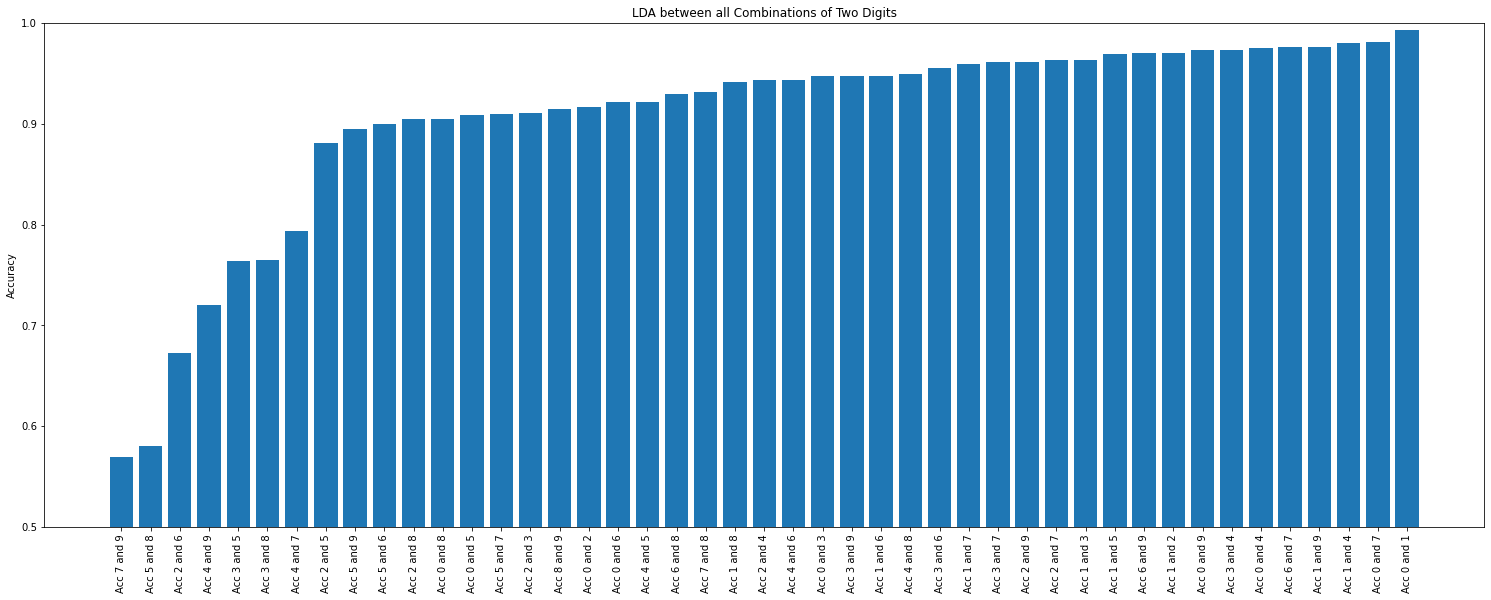

<Figure size 432x288 with 0 Axes>

In [35]:
fig = plt.figure(figsize=(20, 7))
ax = fig.add_axes([0,0,1,1])
sort = [s for _,s in sorted(zip(meas,labs))]
ax.bar(sort,sorted(meas))
ax.set_ylabel('Accuracy')
ax.set_ylim(0.5,1)
ax.set_title('LDA between all Combinations of Two Digits')
plt.xticks(labs, rotation='vertical')
plt.show()
plt.tight_layout()

In [70]:
# now to set up a SVC to determine how effective support vector machines are on mnist data
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
start = time.time()

# Split the dataset into training and testing sets 
# this command is not needed because we are using the X_pca in order to perform these functions faster using the PCA space
#X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target, test_size=0.2)

# Create a Support Vector Machine (SVM) classifier
clf = SVC()

# Train the classifier on the training set
clf.fit(X_train, y_train)

# Predict the labels of the test set and test set to compare
y_pred = clf.predict(X_test)
y_predtr = clf.predict(Xinput)

# Calculate the accuracy of the classifier on the test set and training set to compare
accuracy = accuracy_score(y_test, y_pred)
traccuracy = accuracy_score(Yinput, y_predtr)

print(f"Accuracy of SVM on MNIST: {accuracy}")
print(f"Training Accuracy of SVM on MNIST: {traccuracy}")
end = time.time()
print('Runtime = ', end - start)

Accuracy of SVM on MNIST: 0.6505
Training Accuracy of SVM on MNIST: 0.9034488574078758
Runtime =  374.7500114440918


In [17]:
# now to determine how SVC does on easiest two digits (0 and 1) and hardest two digits (7 and 9)

# index to just have where values are 0 and 1
Xinput = X_train[(y_train == 0) | (y_train == 1),:]
Yinput = y_train[(y_train == 0) | (y_train == 1)]
Xtest = X_test[(y_test == 0) | (y_test == 1)]
Ytest = y_test[(y_test == 0) | (y_test == 1)]

clf = SVC()

# Train the classifier on the training set
clf.fit(Xinput, Yinput)

# Predict the labels of the test set and training set to compare
y_pred = clf.predict(Xtest)
y_predtr = clf.predict(Xinput)

accuracy =  accuracy_score(Ytest, y_pred)
traccuracy = accuracy_score(Yinput, y_predtr)

print('SVM Accuracy between ', 0 ,'and' , 1, 'is' , accuracy)
print('Training Accuracy between ', 0 ,'and' , 1, 'is' , traccuracy)
Xinput = X_train[(y_train == 7) | (y_train == 9),:]
Yinput = y_train[(y_train == 7) | (y_train == 9)]
Xtest = X_test[(y_test == 7) | (y_test == 9)]
Ytest = y_test[(y_test == 7) | (y_test == 9)]

clf.fit(Xinput, Yinput)

# Predict the labels of the test set and training set to compare
y_pred = clf.predict(Xtest)
y_predtr = clf.predict(Xinput)

accuracy =  accuracy_score(Ytest, y_pred)
traccuracy = accuracy_score(Yinput, y_predtr)

print('SVM Accuracy between ', 7 ,'and' , 9, 'is' , accuracy)
print('Training Accuracy between ', 7 ,'and' , 9, 'is' , traccuracy)


SVM Accuracy between  0 and 1 is 0.9965765148921603
Training Accuracy between  0 and 1 is 0.9964583860359221
SVM Accuracy between  7 and 9 is 0.7005438477226377
Training Accuracy between  7 and 9 is 0.704748430453621


In [18]:
from sklearn.tree import DecisionTreeClassifier
start = time.time()

# Create a decision tree classifier and fit it to the training data
treeclf = DecisionTreeClassifier(random_state=42)
treeclf.fit(X_train, y_train)

# Predict the labels of the test data and training set to compare
y_pred = treeclf.predict(X_test)
y_predtr = treeclf.predict(Xinput)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred)
traccuracy = accuracy_score(Yinput, y_predtr)
print(f"Accuracy of Decision Tree on MNIST: {accuracy:.2f}")
print(f"Training Accuracy of Decision Tree on MNIST: {traccuracy:.2f}")
end = time.time()
print('Runtime = ', end - start)

Accuracy of Decision Tree on MNIST: 0.56
Training Accuracy of Decision Tree on MNIST: 1.00
Runtime =  0.9745171070098877


In [27]:
# now to determine how SVC does on easiest two digits (0 and 1) and hardest two digits (7 and 9)

# index to just have where values are 0 and 1
Xinput = X_train[(y_train == 0) | (y_train == 1),:]
Yinput = y_train[(y_train == 0) | (y_train == 1)]
Xtest = X_test[(y_test == 0) | (y_test == 1)]
Ytest = y_test[(y_test == 0) | (y_test == 1)]

treeclf = DecisionTreeClassifier(random_state=42)
treeclf.fit(Xinput, Yinput)

# Predict the labels of the test set
y_pred = treeclf.predict(Xtest)
y_predtr = treeclf.predict(Xinput)

accuracy =  accuracy_score(Ytest, y_pred)
traccuracy = accuracy_score(Yinput, y_predtr)

print('Decision Tree Accuracy between ', 0 ,'and' , 1, 'is' , accuracy)
print('Training Decision Tree Accuracy between ', 0 ,'and' , 1, 'is' , traccuracy)

Xinput = X_train[(y_train == 7) | (y_train == 9),:]
Yinput = y_train[(y_train == 7) | (y_train == 9)]
Xtest = X_test[(y_test == 7) | (y_test == 9)]
Ytest = y_test[(y_test == 7) | (y_test == 9)]

treeclf = DecisionTreeClassifier(random_state=42)
treeclf.fit(Xinput, Yinput)

# Predict the labels of the test set and training set to compare
y_pred = treeclf.predict(Xtest)
y_predtr = treeclf.predict(Xinput)

accuracy =  accuracy_score(Ytest, y_pred)
traccuracy = accuracy_score(Yinput, y_predtr)
print('Decision Tree Accuracy between ', 7 ,'and' , 9, 'is' , accuracy)
print('Training Decision Tree Accuracy between ', 7 ,'and' , 9, 'is' , traccuracy)

Decision Tree Accuracy between  0 and 1 is 0.9945224238274564
Training Decision Tree Accuracy between  0 and 1 is 1.0
Decision Tree Accuracy between  7 and 9 is 0.6329027872195785
Training Decision Tree Accuracy between  7 and 9 is 1.0


In [52]:
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(treeclf, out_file=None, 
                           feature_names=['pixel_{}'.format(i) for i in range(4)],
                           class_names=[str(i) for i in range(2)],
                           filled=True, rounded=True,  
                           special_characters=True)  
graph = graphviz.Source(dot_data)  
graph.format = 'png'
#graph.render('digit tree')

# I had a bit of trouble getting the file to open as a png but I hope this shows I was very close to getting a picture
#of the tree

### Comparison of Models
Comparing the accuracy between the 3 models on training and test data, the decision tree had the highest on the training data with 100% accuracy. This is thought to be because the tree breaks down the training data to the individual branches so each data point is given what it is. The 3 models had comparably high results for the testing data on the 0 and 1 classification all over 99%. When looking at distinuishing 7 and 9 the decision tree had 100% accuracy for the training set for the reason stated above, however all three models were much lower on the testing set. The SVM model was the highest with 70% compared to 56% and 63% for the LDA and decision tree respectively. The SVM with this result is probably the best model all around. The SVM model also had a somewhat high accuracy when applied to the whole mnist data set. Connecting to the class discussion, when these models are ran on the mnist dataset itself they are much more accurate than when run on the PCA space of the mnist data set. This is due to a trade off of information for processing time. The PCA reduced the data to 4 main components in this case as opposed to the potential 784. This means it would have taken much longer to compute these models on the data without this middle step of PCA. 